<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/time_features_and_calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# create calls per day dataframe

In [3]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi21 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2021.csv")
uwwi20 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2020.csv")
uwwi = pd.concat([uwwi22, uwwi21, uwwi20])
uwwi["Interaction_CreateStamp"] = pd.to_datetime(uwwi.Interaction_CreateStamp, utc=True)
uwwi["Interaction_EditStamp"] = pd.to_datetime(uwwi.Interaction_EditStamp, utc=True)
uwwi20.shape

(14357, 40)

In [27]:
uwwi["Interaction_CreateStamp"].groupby([uwwi.Interaction_CreateStamp.dt.year, uwwi.Interaction_CreateStamp.dt.month,  uwwi.Interaction_CreateStamp.dt.day]).agg('count')

Interaction_CreateStamp  Interaction_CreateStamp  Interaction_CreateStamp
2020                     1                        1                          35
                                                  2                          46
                                                  3                          43
                                                  4                          34
                                                  5                          14
                                                                             ..
2022                     11                       27                         12
                                                  28                         28
                                                  29                         24
                                                  30                         23
                         12                       1                          13
Name: Interaction_CreateStamp, Length: 1066, d

In [7]:
calls = list(uwwi["Interaction_CreateStamp"].groupby([uwwi.Interaction_CreateStamp.dt.year, uwwi.Interaction_CreateStamp.dt.month,  uwwi.Interaction_CreateStamp.dt.day]).agg('count'))
print(len(calls), 3*365)

1066 1095


In [26]:
dates = sorted(uwwi.Interaction_CreateStamp.dt.strftime("%Y-%m-%d").unique())
len(dates)

1066

In [41]:
calls_per_day = pd.DataFrame()
calls_per_day["dates"] = pd.to_datetime(dates)
calls_per_day["calls"] = calls
calls_per_day

,dates,calls
0,2020-01-01,35
1,2020-01-02,46
2,2020-01-03,43
3,2020-01-04,34
4,2020-01-05,14
...,...,...
1061,2022-11-27,12
1062,2022-11-28,28
1063,2022-11-29,24
1064,2022-11-30,23


In [72]:
calls_per_day.to_csv("calls_per_day.csv")

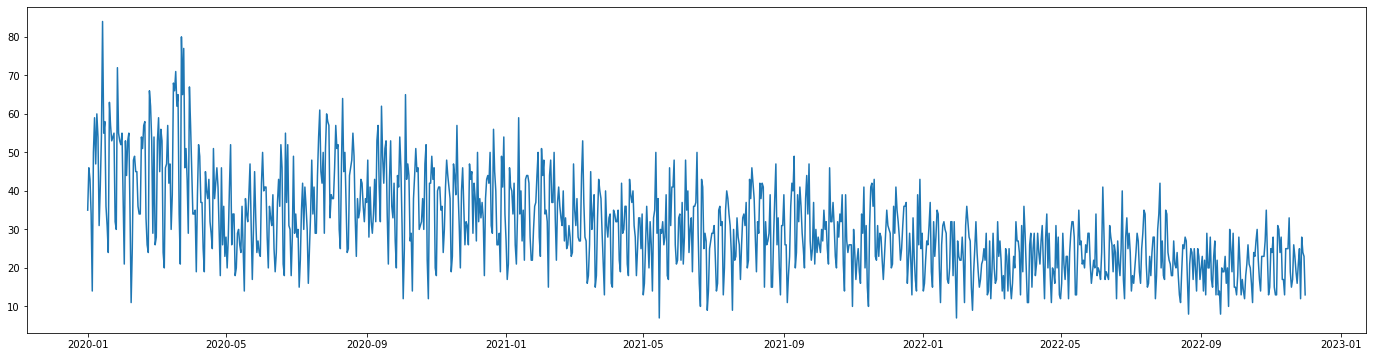

In [44]:
plt.figure(figsize=(24,6))
plt.plot(calls_per_day.dates, calls_per_day.calls)
plt.show()

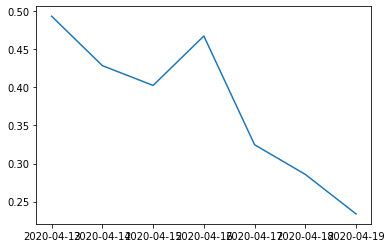

In [71]:
# https://www.kaggle.com/code/anirbank/callcenteroptimization/notebook

scaler = MinMaxScaler(feature_range=(0, 1))
calls_scaled = scaler.fit_transform(np.array(calls_per_day.calls).reshape(-1, 1))
calls_per_day["calls_scaled"] = list(calls_scaled.flatten())

plt.plot(calls_per_day.dates.loc[103:109], calls_per_day.calls_scaled.loc[103:109])
plt.show()

In [60]:
train_size = int(len(calls_scaled)*0.8)
test_size = len(calls_scaled) - train_size
train, test = calls_scaled[0:train_size,:], calls_scaled[train_size:len(calls_scaled),:]
print(len(train), len(test))

852 214


# add weather features

## missing row (10/03/2022) in stevens_point df

In [154]:
weather = pd.read_csv("https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/Weather%20Datasets/Wisconsin_Weather_WY2017-2023.csv")
stevens_point = weather[weather.NAME=="STEVENS POINT, WI US"]
stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)
stevens_point = stevens_point.iloc[1187:,:]
stevens_point.DATE

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,37,39,41,43,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-154-6e8beb90c5ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)


72694   2020-01-01
72695   2020-01-02
72696   2020-01-03
72697   2020-01-04
72698   2020-01-05
           ...    
73751   2022-11-24
73752   2022-11-25
73753   2022-11-26
73754   2022-11-27
73755   2022-11-28
Name: DATE, Length: 1062, dtype: datetime64[ns]

In [81]:
# calls_per_day = calls_per_day.iloc[:-3,:]
calls_per_day.dates

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
1058   2022-11-24
1059   2022-11-25
1060   2022-11-26
1061   2022-11-27
1062   2022-11-28
Name: dates, Length: 1063, dtype: datetime64[ns]

In [155]:
l1 = list(calls_per_day.dates)
l2 = list(stevens_point.DATE)
for i in range(len(stevens_point.DATE)):
  if l1[i] != l2[i]:
    print(i, l1[i], l2[i], l1[0] == l2[0])
    i -= 1
    print(i, l1[i], l2[i], l1[0] == l2[0])
    i += 2
    print(i, l1[i], l2[i], l1[0] == l2[0])
    break

1006 2022-10-03 00:00:00 2022-10-04 00:00:00 True
1005 2022-10-02 00:00:00 2022-10-02 00:00:00 True
1007 2022-10-04 00:00:00 2022-10-05 00:00:00 True


In [156]:
stevens_point[1004:1008].DATE

73698   2022-10-01
73699   2022-10-02
73700   2022-10-04
73701   2022-10-05
Name: DATE, dtype: datetime64[ns]

In [157]:
df1 = stevens_point[:1006]
df1.DATE.tail()

73695   2022-09-28
73696   2022-09-29
73697   2022-09-30
73698   2022-10-01
73699   2022-10-02
Name: DATE, dtype: datetime64[ns]

In [158]:
df2 = stevens_point[1006:]
df2.DATE.head()

73700   2022-10-04
73701   2022-10-05
73702   2022-10-06
73703   2022-10-07
73704   2022-10-08
Name: DATE, dtype: datetime64[ns]

In [159]:
df3 = pd.DataFrame()
df3 = stevens_point.iloc[100:101,:]
df3["DATE"] = pd.to_datetime("2022-10-03")
df3

<ipython-input-159-49fc5b0bf3ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["DATE"] = pd.to_datetime("2022-10-03")


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,...,WESF,WESF_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES
72794,USC00478171,"STEVENS POINT, WI US",44.5115,-89.5853,328.9,2022-10-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
frames = [df1, df3, df2]
stevens_point = pd.concat(frames)
stevens_point[1004:1010].DATE

73698   2022-10-01
73699   2022-10-02
72794   2022-10-03
73700   2022-10-04
73701   2022-10-05
73702   2022-10-06
Name: DATE, dtype: datetime64[ns]

In [164]:
calls_per_day["snwd"] = list(stevens_point.SNWD)
calls_per_day = calls_per_day.drop(["calls_scaled"], axis=1)
calls_per_day

<ipython-input-164-a97b4158a75d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_per_day["snwd"] = list(stevens_point.SNWD)


,dates,calls,snwd
0,2020-01-01,35,6.0
1,2020-01-02,46,6.0
2,2020-01-03,43,6.0
3,2020-01-04,34,5.0
4,2020-01-05,14,4.0
...,...,...,...
1058,2022-11-24,16,1.0
1059,2022-11-25,21,0.0
1060,2022-11-26,25,0.0
1061,2022-11-27,12,0.0


In [173]:
calls_per_day.snwd["snwd"] = list(calls_per_day.snwd.fillna(calls_per_day.snwd.mean()))

In [174]:
calls_per_day.to_csv("calls_per_day.csv", index=False)

# prophet.streamlit.app

https://bsenst.github.io/UWWi_DataDive_Dec22/